# Data Wrangling and Cleaning <a id='2.2_Introduction'></a>

## Imports

I am importing pandas to work with dataframes, and I am importing matplotlib and seaborn for initial data visualization. I might use numpy for statistical computations.

In [253]:
# Imports
import pandas as pd
pd.options.mode.chained_assignment=None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is the main dataset that contains information for each Food Environment Atlas category.

In [254]:
# Importing Dataset
file_food_atlas = 'StateAndCountyData.csv'
data_state_county = pd.read_csv(file_food_atlas)
data_state_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [255]:
data_state_county.dtypes

FIPS               int64
State             object
County            object
Variable_Code     object
Value            float64
dtype: object

In [256]:
data_state_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852810 entries, 0 to 852809
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   FIPS           852810 non-null  int64  
 1   State          852810 non-null  object 
 2   County         852810 non-null  object 
 3   Variable_Code  852810 non-null  object 
 4   Value          852810 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.5+ MB


In [257]:
data_state_county.describe()

,FIPS,Value
count,852810.000000,8.528100e+05
mean,30336.233835,1.053919e+04
std,15188.596259,2.148199e+05
min,1.000000,-1.000000e+02
25%,18171.000000,0.000000e+00
50%,29171.000000,3.000000e+00
75%,45069.000000,2.910000e+01
max,56045.000000,3.955704e+07


In [258]:
data_state_county.columns

Index(['FIPS', 'State', 'County', 'Variable_Code', 'Value'], dtype='object')

This dataset contains supplemental information at the state level.

In [259]:
# Importing State Dataset
file_state_data = 'SupplementalDataState.csv'
data_state = pd.read_csv(file_state_data)
data_state.head()

,State_FIPS,State,Variable_Code,Value
0,1,AL,WIC_PART_2012,141899.8333
1,1,AL,WIC_PART_2013,139000.5000
2,1,AL,WIC_PART_2014,131046.2500
3,1,AL,WIC_PART_2015,132132.7500
4,1,AL,WIC_PART_2016,129159.9167


In [260]:
data_state['Variable_Code']

0               WIC_PART_2012
1               WIC_PART_2013
2               WIC_PART_2014
3               WIC_PART_2015
4               WIC_PART_2016
                ...          
2137    State_Population_2014
2138    State_Population_2015
2139    State_Population_2016
2140    State_Population_2017
2141    State_Population_2018
Name: Variable_Code, Length: 2142, dtype: object

This dataset contains supplemental information at the county level, specifically it contains population data.

In [261]:
# Importing County Dataset
file_county_data = 'SupplementalDataCounty.csv'
data_county = pd.read_csv(file_county_data)
data_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga County,2010_Census_Population,54571
1,1001,AL,Autauga County,Population_Estimate_2011,55208
2,1001,AL,Autauga County,Population_Estimate_2012,54936
3,1001,AL,Autauga County,Population_Estimate_2013,54713
4,1001,AL,Autauga County,Population_Estimate_2014,54876


In [262]:
data_county.dtypes

FIPS              int64
State            object
County           object
Variable_Code    object
Value             int64
dtype: object

## Filtering data

I am filtering the data by the years 2010 and 2015 to limit my comparisons.

In [263]:
filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(10|15)$')]

/tmp/ipykernel_6214/3209300512.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(10|15)$')]


In [264]:
filtered_df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


I am removing punctuation and the word 'County' as well as making all County names lowercase to keep data consistent.This notebook is for Data Wrangling and Cleaning

In [265]:
filtered_df['County'] = filtered_df['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['County'] = filtered_df['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
filtered_df['County'] = filtered_df['County'].str.strip() # Remove leading and trailing spaces
filtered_df['County'] = filtered_df['County'].str.lower() # Convert to lowercase

In [266]:
filtered_df.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,autauga,LACCESS_POP10,18428.439690
1,1001,AL,autauga,LACCESS_POP15,17496.693040
2,1001,AL,autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,autauga,PCT_LACCESS_POP15,32.062255


I am removing punctuation and the word 'State' as well as making all State names uppercase to keep data consistent.

In [267]:
filtered_df['State'] = filtered_df.loc[:, 'State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['State'] = filtered_df['State'].str.strip() # Remove leading and trailing spaces
filtered_df['State'] = filtered_df['State'].str.upper() # Convert to uppercase

I am turning my dataframe into a pivot table to turn the 'Variable_Code' column values into a column for each distinct value. This will create a single row for each country in each state that contains a column value for each value in 'Variable_Code'.

In [268]:
pivot_df = filtered_df.pivot_table(index=['FIPS', 'State', 'County'], columns='Variable_Code', values='Value').reset_index()

In [269]:
filtered_counties = data_county[data_county['Variable_Code'].str.contains('(10|15)$')]

filtered_counties['County'] = filtered_counties['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_counties['County'] = filtered_counties['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
filtered_counties['County'] = filtered_counties['County'].str.strip() # Remove leading and trailing spaces
filtered_counties['County'] = filtered_counties['County'].str.lower() # Convert to lowercase

filtered_counties['State'] = filtered_counties['State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_counties['State'] = filtered_counties['State'].str.strip() # Remove leading and trailing spaces
filtered_counties['State'] = filtered_counties['State'].str.upper() # Convert to lowercase

counties = filtered_counties.pivot_table(index=['FIPS', 'State', 'County'], columns='Variable_Code', values='Value').reset_index()

/tmp/ipykernel_6214/2238852378.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_counties = data_county[data_county['Variable_Code'].str.contains('(10|15)$')]


In [270]:
counties.head()

Variable_Code,FIPS,State,County,Population_Estimate_2015
0,1001,AL,autauga,54838
1,1003,AL,baldwin,202995
2,1005,AL,barbour,26294
3,1007,AL,bibb,22562
4,1009,AL,blount,57522


In [271]:
counties.isna().sum()

Variable_Code
FIPS                        0
State                       0
County                      0
Population_Estimate_2015    0
dtype: int64

### State Dataframe

I am isolating state totals in a separate dataframe. As I will display below, the columns contained in this dataframe only contain values for state totals. I will drop them from my primary dataframe, but keep them in a separate dataframe: state_totals.

In [272]:
state_totals = pivot_df[pivot_df['County']=='total']

In [273]:
state_totals = state_totals.dropna(axis=1, how='all')

In [274]:
state_totals.head()

Variable_Code,FIPS,State,County,CACFP_PART_2015,NSLP_PART_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,1,AL,total,51263.75,5.313053e+05,2.542703e+05,49715.0,4853160.0,1.321328e+05
1,2,AK,total,10786.50,5.361692e+04,2.511123e+04,5850.0,737547.0,1.968200e+04
2,4,AZ,total,42551.50,6.474257e+05,3.087424e+05,14763.0,6833596.0,1.670722e+05
3,5,AR,total,67984.50,3.209214e+05,1.801209e+05,31081.0,2978407.0,8.421958e+04
4,6,CA,total,562667.00,3.271744e+06,1.691159e+06,128025.0,38953142.0,1.265005e+06


In [275]:
state_totals.isna().sum()

Variable_Code
FIPS                     0
State                    0
County                   0
CACFP_PART_2015          0
NSLP_PART_2015           0
SBP_PART_2015            0
SFSP_PART_2015           0
State_Population_2015    0
WIC_PART_2015            0
dtype: int64

In [276]:
state_totals.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2015', 'NSLP_PART_2015',
       'SBP_PART_2015', 'SFSP_PART_2015', 'State_Population_2015',
       'WIC_PART_2015'],
      dtype='object', name='Variable_Code')

## Exploring pivot_df

In [277]:
pivot_df.dtypes

Variable_Code
FIPS                          int64
State                        object
County                       object
CACFP_PART_2015             float64
CHILDPOVRATE15              float64
                             ...   
Population_Estimate_2015    float64
SBP_PART_2015               float64
SFSP_PART_2015              float64
State_Population_2015       float64
WIC_PART_2015               float64
Length: 72, dtype: object

In [278]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3328 non-null   int64  
 1   State                      3328 non-null   object 
 2   County                     3328 non-null   object 
 3   CACFP_PART_2015            51 non-null     float64
 4   CHILDPOVRATE15             3139 non-null   float64
 5   FARM_TO_SCHOOL15           2925 non-null   float64
 6   FDPIR15                    3143 non-null   float64
 7   LACCESS_BLACK15            3124 non-null   float64
 8   LACCESS_CHILD10            3143 non-null   float64
 9   LACCESS_CHILD15            3124 non-null   float64
 10  LACCESS_CHILD_10_15        3115 non-null   float64
 11  LACCESS_HHNV10             3143 non-null   float64
 12  LACCESS_HHNV15             3140 non-null   float64
 13  LACCESS_HISP15             3124 non-null   float

FIPS, State, and County all have the most non-null values (6334 each).

In [279]:
pivot_df.describe()

Variable_Code,FIPS,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
count,3328.000000,51.000000,3139.000000,2925.000000,3143.000000,3124.000000,3143.000000,3124.000000,3115.000000,3143.000000,...,2854.000000,3143.000000,3143.000000,3141.000000,3139.000000,3.142000e+03,5.100000e+01,51.000000,5.100000e+01,5.100000e+01
mean,29764.681490,81465.823529,23.238738,0.616410,0.159402,2269.428677,4959.224239,4742.980900,277.377250,660.785705,...,7.288870,0.225262,0.112313,0.168418,16.260975,1.020823e+05,2.728003e+05,49691.372549,6.289072e+06,1.536727e+05
std,15635.421817,108545.059263,9.364172,0.486343,0.977978,8793.761183,13169.301375,12216.611681,11060.345777,1121.141847,...,3.713097,0.417822,0.315801,0.374296,6.442319,3.281943e+05,3.570125e+05,66465.618598,7.177506e+06,2.180488e+05
min,1.000000,5581.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.400000,8.800000e+01,1.468345e+04,3997.000000,5.856680e+05,1.099542e+04
25%,18110.500000,18939.375000,16.250000,0.000000,0.000000,7.000000,365.133646,354.654348,-11.021858,118.101203,...,5.091226,0.000000,0.000000,0.000000,11.500000,1.094800e+04,7.343671e+04,12752.000000,1.746760e+06,3.905363e+04
50%,29072.000000,49897.500000,22.300000,1.000000,0.000000,86.612488,937.758224,956.123349,-0.048853,320.065422,...,7.302426,0.000000,0.000000,0.000000,15.200000,2.563250e+04,1.850943e+05,33013.000000,4.425999e+06,1.055036e+05
75%,45067.500000,88461.125000,29.100000,1.000000,0.000000,1007.743295,3008.123733,3020.174780,7.263646,706.480605,...,9.393252,0.000000,0.000000,0.000000,19.700000,6.748825e+04,2.937282e+05,61503.500000,6.998570e+06,1.580745e+05
max,56045.000000,562667.000000,61.600000,1.000000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,...,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07,1.902636e+06,438926.000000,3.895314e+07,1.265005e+06


In [280]:
pivot_df.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2015', 'CHILDPOVRATE15',
       'FARM_TO_SCHOOL15', 'FDPIR15', 'LACCESS_BLACK15', 'LACCESS_CHILD10',
       'LACCESS_CHILD15', 'LACCESS_CHILD_10_15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'LACCESS_HISP15', 'LACCESS_LOWI10', 'LACCESS_LOWI15',
       'LACCESS_MULTIR15', 'LACCESS_NHASIAN15', 'LACCESS_NHNA15',
       'LACCESS_NHPI15', 'LACCESS_POP10', 'LACCESS_POP15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'LACCESS_SNAP15', 'LACCESS_WHITE15', 'MEDHHINC15',
       'NSLP_PART_2015', 'PCH_FDPIR_12_15', 'PCH_LACCESS_HHNV_10_15',
       'PCH_LACCESS_LOWI_10_15', 'PCH_LACCESS_POP_10_15',
       'PCH_LACCESS_SENIORS_10_15', 'PCT_18YOUNGER10', 'PCT_65OLDER10',
       'PCT_FREE_LUNCH10', 'PCT_FREE_LUNCH15', 'PCT_HISP10',
       'PCT_LACCESS_BLACK15', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15',
       'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15', 'PCT_LACCESS_HISP15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'PCT_LACCESS_MULTIR15

## Finding/Fixing Missing Values

I want to find missing values in my dataframe, so I can properly address them.

In [281]:
pivot_df.isna()

Variable_Code,FIPS,State,County,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3324,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3325,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3326,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [282]:
pivot_df[pivot_df['County']=='total']

Variable_Code,FIPS,State,County,CACFP_PART_2015,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,...,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015,SBP_PART_2015,SFSP_PART_2015,State_Population_2015,WIC_PART_2015
0,1,AL,total,51263.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.542703e+05,49715.0,4853160.0,1.321328e+05
1,2,AK,total,10786.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.511123e+04,5850.0,737547.0,1.968200e+04
2,4,AZ,total,42551.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.087424e+05,14763.0,6833596.0,1.670722e+05
3,5,AR,total,67984.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.801209e+05,31081.0,2978407.0,8.421958e+04
4,6,CA,total,562667.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.691159e+06,128025.0,38953142.0,1.265005e+06
5,8,CO,total,43319.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.850137e+05,20180.0,5452107.0,9.095350e+04
6,9,CT,total,21873.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.010029e+05,28276.0,3587509.0,5.129542e+04
7,10,DE,total,19986.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.798010e+04,10425.0,941413.0,1.899792e+04
8,11,DC,total,5581.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.449874e+04,28713.0,675254.0,1.452592e+04
9,12,FL,total,269541.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.865135e+05,163418.0,20224249.0,4.838108e+05


### Dropping Columns with Mostly Missing Values

I am calculating columns that have greater than 50% missing values.

In [283]:
missing_sum = pivot_df.isnull().sum()
missing_percent = 100 * pivot_df.isnull().mean()
missing = pd.concat([missing_sum, missing_percent], axis=1)
missing = missing.sort_values([0, 1], ascending=False)

In [284]:
missing = missing.rename(columns = {1:'Percent'})
missing = missing.rename(columns = {0:'Sum'})

In [285]:
missing[missing.Percent > 50]

,Sum,Percent
Variable_Code,,
CACFP_PART_2015,3277,98.467548
NSLP_PART_2015,3277,98.467548
SBP_PART_2015,3277,98.467548
SFSP_PART_2015,3277,98.467548
State_Population_2015,3277,98.467548
WIC_PART_2015,3277,98.467548


I am dropping columns that I identified as having greater than 50% missing values.

In [286]:
pivot_df = pivot_df.drop(['CACFP_PART_2015', 'NSLP_PART_2015', 'SBP_PART_2015', 'SFSP_PART_2015', 'State_Population_2015', 'WIC_PART_2015'], axis=1)

In [287]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
PCT_FREE_LUNCH15       474
PCT_REDUCED_LUNCH15    474
FARM_TO_SCHOOL15       403
PCT_REDUCED_LUNCH10    216
LACCESS_CHILD_10_15    213
                      ... 
PCT_HISP10             185
PCT_LACCESS_CHILD10    185
State                    0
County                   0
FIPS                     0
Length: 66, dtype: int64

In [288]:
#pivot_df.info()

I am dropping 'PCH_FDPIR_12_15' because it contains dates outside of 2010 and 2015.

In [289]:
pivot_df = pivot_df.drop('PCH_FDPIR_12_15', axis=1)

'FARM_TO_SCHOOL15' is a categorical variable. First, I am converting null values to zeroes since these are counties do not have farm to school programs. I then changed the variable to be categorical.

In [290]:
pivot_df['FARM_TO_SCHOOL15'] = pivot_df['FARM_TO_SCHOOL15'].fillna(0)

In [291]:
pivot_df['FARM_TO_SCHOOL15'] = pivot_df['FARM_TO_SCHOOL15'].astype('int')

In [292]:
pivot_df['FARM_TO_SCHOOL15'] = pivot_df['FARM_TO_SCHOOL15'].astype('category')

#categories_farm_to_school = ['No Program', 'Program Exists']
#pivot_df['FARM_TO_SCHOOL15'] = pd.qcut(pivot_df['FARM_TO_SCHOOL15'], q=[0, 1], duplicates='drop')
pivot_df['FARM_TO_SCHOOL15'].sort_values(ascending=False)

2778    1
2712    1
1989    1
1990    1
1991    1
       ..
1317    0
1316    0
1315    0
1314    0
3327    0
Name: FARM_TO_SCHOOL15, Length: 3328, dtype: category
Categories (2, int64): [0, 1]

I am checking the number of missing values per row.

In [293]:
row_nan_count_method = pivot_df.isnull().sum(axis=1)
missing_rows = row_nan_count_method[row_nan_count_method > 30]
missing_rows

0       61
1       61
2       61
3       61
4       61
        ..
3130    60
3132    60
3134    60
3136    60
3138    60
Length: 187, dtype: int64

In [294]:
pivot_df[["FIPS", "County", "State", "Population_Estimate_2015"]].sort_values(ascending=False, by="Population_Estimate_2015")

Variable_Code,FIPS,County,State,Population_Estimate_2015
284,6037,los angeles,CA,10097037.0
690,17031,cook,IL,5247662.0
2770,48201,harris,TX,4561939.0
183,4013,maricopa,AZ,4175049.0
302,6073,san diego,CA,3284061.0
...,...,...,...,...
3129,51800,suffolk,VA,NaN
3131,51810,virginia beach,VA,NaN
3133,51820,waynesboro,VA,NaN
3135,51830,williamsburg,VA,NaN


I am making a new dataframe to separate my condensed data and not affect my original dataframe.

In [295]:
pivot_df["Population_Estimate_2015"].isna().sum()

186

### df_condensed

I am creating a separate dataframe for my condensed data, so I can drop/fill missing values without impacting pivot_df.

In [296]:
df_condensed = pivot_df # Creating a new dataframe to deal with my condensed data.

In [297]:
df_condensed.dropna(axis=0, thresh=30, inplace=True)

In [298]:
df_condensed.isna().sum(axis=1).sort_values(ascending=False)

3083    34
3062    32
2659    30
1385    28
1111    28
        ..
1145     0
1146     0
1147     0
1148     0
3327     0
Length: 3143, dtype: int64

In [299]:
df_condensed.isna().sum().sort_values(ascending=False)

Variable_Code
PCT_REDUCED_LUNCH15         289
PCT_FREE_LUNCH15            289
Population_Estimate_2015    135
PCT_REDUCED_LUNCH10          31
LACCESS_CHILD_10_15          28
                           ... 
LACCESS_POP10                 0
PCT_LACCESS_CHILD10           0
PCT_LACCESS_LOWI10            0
LACCESS_SENIORS10             0
FIPS                          0
Length: 65, dtype: int64

In [300]:
df_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3143 entries, 51 to 3327
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FIPS                       3143 non-null   int64   
 1   State                      3143 non-null   object  
 2   County                     3143 non-null   object  
 3   CHILDPOVRATE15             3139 non-null   float64 
 4   FARM_TO_SCHOOL15           3143 non-null   category
 5   FDPIR15                    3143 non-null   float64 
 6   LACCESS_BLACK15            3124 non-null   float64 
 7   LACCESS_CHILD10            3143 non-null   float64 
 8   LACCESS_CHILD15            3124 non-null   float64 
 9   LACCESS_CHILD_10_15        3115 non-null   float64 
 10  LACCESS_HHNV10             3143 non-null   float64 
 11  LACCESS_HHNV15             3140 non-null   float64 
 12  LACCESS_HISP15             3124 non-null   float64 
 13  LACCESS_LOWI10             3143 non-n

### Filling Columns with Median by State

I am filling the missing values for each column (except Population_Estimate_2015) with the median value for each state. I choose to fill the missing values with the median by state because the United States varies greatly by state and the state median better represents the county than any other value. I am also choosing the median over the mean because each state tends to have few major cities that vary greatly from the rest of the counties in the state; therefore, the median is the best statistical measure to use as it will not be swayed by outliers caused by cities.

In [301]:
reduced_dict = df_condensed.groupby("State")["PCT_REDUCED_LUNCH15"].median().to_dict()
df_condensed["PCT_REDUCED_LUNCH15"] = df_condensed["PCT_REDUCED_LUNCH15"].fillna(df_condensed["State"].map(reduced_dict))

In [302]:
free_dict = df_condensed.groupby("State")["PCT_FREE_LUNCH15"].median().to_dict()
df_condensed["PCT_FREE_LUNCH15"] = df_condensed["PCT_FREE_LUNCH15"].fillna(df_condensed["State"].map(free_dict))

In [303]:
df_condensed['PCT_REDUCED_LUNCH15'] = df_condensed['PCT_REDUCED_LUNCH15'].fillna(0)

In [304]:
df_condensed['PCT_FREE_LUNCH15'] = df_condensed['PCT_FREE_LUNCH15'].fillna(0)

In [305]:
reduced10_dict = df_condensed.groupby("State")["PCT_REDUCED_LUNCH10"].median().to_dict()
df_condensed["PCT_REDUCED_LUNCH10"] = df_condensed["PCT_REDUCED_LUNCH10"].fillna(df_condensed["State"].map(reduced10_dict))

In [306]:
df_condensed["PCT_REDUCED_LUNCH10"].isna().sum()

0

In [307]:
laccess_child1015_dict = df_condensed.groupby("State")["LACCESS_CHILD_10_15"].median().to_dict()
df_condensed["LACCESS_CHILD_10_15"] = df_condensed["LACCESS_CHILD_10_15"].fillna(df_condensed["State"].map(laccess_child1015_dict))

In [308]:
df_condensed["LACCESS_CHILD_10_15"].isna().sum()

0

In [309]:
pch_lowi = df_condensed.groupby("State")["PCH_LACCESS_LOWI_10_15"].median().to_dict()
df_condensed["PCH_LACCESS_LOWI_10_15"] = df_condensed["PCH_LACCESS_LOWI_10_15"].fillna(df_condensed["State"].map(pch_lowi))

In [310]:
df_condensed["PCH_LACCESS_LOWI_10_15"].isna().sum()

0

In [311]:
pch_pop = df_condensed.groupby("State")["PCH_LACCESS_POP_10_15"].median().to_dict()
df_condensed["PCH_LACCESS_POP_10_15"] = df_condensed["PCH_LACCESS_POP_10_15"].fillna(df_condensed["State"].map(pch_pop))

In [312]:
df_condensed["PCH_LACCESS_POP_10_15"].isna().sum()

0

In [313]:
pch_senior = df_condensed.groupby("State")["PCH_LACCESS_SENIORS_10_15"].median().to_dict()
df_condensed["PCH_LACCESS_SENIORS_10_15"] = df_condensed["PCH_LACCESS_SENIORS_10_15"].fillna(df_condensed["State"].map(pch_senior))

In [314]:
df_condensed["PCH_LACCESS_SENIORS_10_15"].isna().sum()

0

In the lines above, I utilized .isna().sum() to double check that my method filled all missing values.

In [315]:
pct_free = df_condensed.groupby("State")["PCT_FREE_LUNCH10"].median().to_dict()
df_condensed["PCT_FREE_LUNCH10"] = df_condensed["PCT_FREE_LUNCH10"].fillna(df_condensed["State"].map(pct_free))

In [316]:
lowi15 = df_condensed.groupby("State")["LACCESS_LOWI15"].median().to_dict()
df_condensed["LACCESS_LOWI15"] = df_condensed["LACCESS_LOWI15"].fillna(df_condensed["State"].map(lowi15))

I am writing a method to calculate and impute the median for the missing values in each column by state.

In [317]:
def fill_missing(df, col):
    median = df.groupby("State")[col].median().to_dict()
    df[col] = df[col].fillna(df["State"].map(median))
    return df_condensed[col]
fill_missing(df_condensed, "LACCESS_SNAP15")

51      931.935186
52      950.535290
53      422.569040
54       53.818772
55      175.370338
           ...    
3323    352.866113
3324     60.192270
3325    158.918171
3326     36.804973
3327     29.336258
Name: LACCESS_SNAP15, Length: 3143, dtype: float64

In [318]:
df_condensed["LACCESS_SNAP15"].isna().sum()

0

In [319]:
fill_missing(df_condensed, "PCT_LACCESS_SNAP15")
fill_missing(df_condensed, "PCT_LACCESS_LOWI15")
fill_missing(df_condensed, "LACCESS_NHNA15")
fill_missing(df_condensed, "PCT_LACCESS_MULTIR15")
fill_missing(df_condensed, "PCT_LACCESS_CHILD15")
fill_missing(df_condensed, "LACCESS_MULTIR15")
fill_missing(df_condensed, "PCT_LACCESS_BLACK15")
fill_missing(df_condensed, "PCT_LACCESS_NHASIAN15")
fill_missing(df_condensed, "LACCESS_HISP15")
fill_missing(df_condensed, "PCT_LACCESS_NHNA15")
fill_missing(df_condensed, "PCT_LACCESS_NHPI15")
fill_missing(df_condensed, "PCT_LACCESS_POP15")
fill_missing(df_condensed, "LACCESS_NHASIAN15")
fill_missing(df_condensed, "PCT_LACCESS_HISP15")
fill_missing(df_condensed, "LACCESS_WHITE15")
fill_missing(df_condensed, "PCT_LACCESS_SENIORS15")
fill_missing(df_condensed, "LACCESS_SENIORS15")
fill_missing(df_condensed, "LACCESS_POP15")
fill_missing(df_condensed, "LACCESS_NHPI15")
fill_missing(df_condensed, "LACCESS_BLACK15")
fill_missing(df_condensed, "LACCESS_CHILD15")
fill_missing(df_condensed, "PCT_LACCESS_WHITE15")
fill_missing(df_condensed, "PCH_LACCESS_HHNV_10_15")
fill_missing(df_condensed, "POVRATE15")
fill_missing(df_condensed, "CHILDPOVRATE15")
fill_missing(df_condensed, "PCT_LACCESS_HHNV15")
fill_missing(df_condensed, "LACCESS_HHNV15")

51       677.672769
52      1394.162766
53       425.144927
54       224.388125
55       719.931444
           ...     
3323     359.608360
3324      48.474161
3325     211.630840
3326      42.030853
3327     112.645982
Name: LACCESS_HHNV15, Length: 3143, dtype: float64

In [320]:
hm = df_condensed.isna().sum().sort_values(ascending=False)

In [321]:
print(hm[hm > 0])

Variable_Code
Population_Estimate_2015    135
MEDHHINC15                    4
POPLOSS10                     2
dtype: int64


In [322]:
hm = df_condensed.isna().sum().sort_values(ascending=False)

In [323]:
fill_missing(df_condensed, "MEDHHINC15")
fill_missing(df_condensed, "POPLOSS10")

51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
       ... 
3323    0.0
3324    0.0
3325    0.0
3326    0.0
3327    0.0
Name: POPLOSS10, Length: 3143, dtype: float64

In [324]:
df_condensed.isna().sum().sort_values(ascending=False)

Variable_Code
Population_Estimate_2015     135
PCT_FREE_LUNCH15               0
PCT_LACCESS_BLACK15            0
PCT_LACCESS_CHILD10            0
PCT_LACCESS_CHILD15            0
                            ... 
PCH_LACCESS_LOWI_10_15         0
PCH_LACCESS_POP_10_15          0
PCH_LACCESS_SENIORS_10_15      0
PCT_18YOUNGER10                0
PCT_FREE_LUNCH10               0
Length: 65, dtype: int64

The only remaining column with missing values is 'Population_Estimate_2015'. I will utilize the counties dataframe that I created earlier to merge the data on the 'FIPS' column.

### County Population Data

In [325]:
counties.head()

Variable_Code,FIPS,State,County,Population_Estimate_2015
0,1001,AL,autauga,54838
1,1003,AL,baldwin,202995
2,1005,AL,barbour,26294
3,1007,AL,bibb,22562
4,1009,AL,blount,57522


In [326]:
counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   FIPS                      3142 non-null   int64 
 1   State                     3142 non-null   object
 2   County                    3142 non-null   object
 3   Population_Estimate_2015  3142 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.3+ KB


In [327]:
counties.describe()

Variable_Code,FIPS,Population_Estimate_2015
count,3142.000000,3.142000e+03
mean,30383.649268,1.020823e+05
std,15162.508374,3.281943e+05
min,1001.000000,8.800000e+01
25%,18177.500000,1.094800e+04
50%,29176.000000,2.563250e+04
75%,45080.500000,6.748825e+04
max,56045.000000,1.009704e+07


### df_full -- Combining df_condensed and counties

I am making a new dataframe called 'co' from the counties dataframe. From co, I will drop the State and County columns, leaving only FIPS and Population_Estimate_2015. I will then drop Population_Estimate_2015 in a new dataframe called 'partial' from df_condensed and merge co and partial as df_full.

In [328]:
co = counties
co = co.drop(['State','County'], axis=1)
partial = df_condensed
partial = partial.drop("Population_Estimate_2015", axis=1)
df_full = pd.merge(partial, co, on='FIPS')
df_full['Population_Estimate_2015'].isna().sum()

0

In [329]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FIPS                       3140 non-null   int64   
 1   State                      3140 non-null   object  
 2   County                     3140 non-null   object  
 3   CHILDPOVRATE15             3140 non-null   float64 
 4   FARM_TO_SCHOOL15           3140 non-null   category
 5   FDPIR15                    3140 non-null   float64 
 6   LACCESS_BLACK15            3140 non-null   float64 
 7   LACCESS_CHILD10            3140 non-null   float64 
 8   LACCESS_CHILD15            3140 non-null   float64 
 9   LACCESS_CHILD_10_15        3140 non-null   float64 
 10  LACCESS_HHNV10             3140 non-null   float64 
 11  LACCESS_HHNV15             3140 non-null   float64 
 12  LACCESS_HISP15             3140 non-null   float64 
 13  LACCESS_LOWI10             3140 n

In [330]:
#population_dict = df_condensed.groupby("State")["Population_Estimate_2015"].median().to_dict()
#df_condensed["Population_Estimate_2015"] = df_condensed["Population_Estimate_2015"].fillna(df_condensed["State"].map(population_dict))
#df_condensed[['FIPS', 'County', 'State', 'Population_Estimate_2015']]

In [331]:
#df_condensed["Population_Estimate_2015"].isna().sum()

In [332]:
#population_dict

In [333]:
#pop_median = df_condensed["Population_Estimate_2015"].median()
#df_condensed["Population_Estimate_2015"] = df_condensed["Population_Estimate_2015"].fillna(pop_median)
#df_condensed[['FIPS', 'State', 'Population_Estimate_2015']].sort_values(ascending=True, by=['Population_Estimate_2015'])

In [334]:
df_full.isna().sum().sort_values(ascending=False)

Variable_Code
FIPS                         0
PCT_FREE_LUNCH15             0
PCT_LACCESS_BLACK15          0
PCT_LACCESS_CHILD10          0
PCT_LACCESS_CHILD15          0
                            ..
PCH_LACCESS_LOWI_10_15       0
PCH_LACCESS_POP_10_15        0
PCH_LACCESS_SENIORS_10_15    0
PCT_18YOUNGER10              0
Population_Estimate_2015     0
Length: 65, dtype: int64

## Examining df_full

In [335]:
df_full.head()

Variable_Code,FIPS,State,County,CHILDPOVRATE15,FARM_TO_SCHOOL15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
0,1001,AL,autauga,18.8,0,0.0,4216.473194,4822.500269,4616.971480,-4.261872,...,0.397647,0.040314,77.246156,6.886107,5.492806,0.0,0.0,0.0,12.7,54838
1,1003,AL,baldwin,19.6,1,0.0,3540.965826,7916.131932,7007.972675,-11.472260,...,0.628755,0.043343,83.504787,5.542340,6.346384,0.0,0.0,0.0,12.9,202995
2,1005,AL,barbour,45.2,0,0.0,2713.124930,940.419327,1031.927776,9.730601,...,0.218524,0.087409,46.753105,4.582140,2.317528,1.0,1.0,0.0,32.0,26294
3,1007,AL,bibb,29.3,0,0.0,419.099942,249.204753,232.642670,-6.645974,...,0.279293,0.030548,75.020729,9.253986,9.060807,1.0,0.0,0.0,22.2,22562
4,1009,AL,blount,22.2,0,0.0,95.842687,384.911607,910.686113,136.596168,...,0.497191,0.031402,88.887338,8.097947,7.895581,0.0,0.0,0.0,14.7,57522


In [336]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   FIPS                       3140 non-null   int64   
 1   State                      3140 non-null   object  
 2   County                     3140 non-null   object  
 3   CHILDPOVRATE15             3140 non-null   float64 
 4   FARM_TO_SCHOOL15           3140 non-null   category
 5   FDPIR15                    3140 non-null   float64 
 6   LACCESS_BLACK15            3140 non-null   float64 
 7   LACCESS_CHILD10            3140 non-null   float64 
 8   LACCESS_CHILD15            3140 non-null   float64 
 9   LACCESS_CHILD_10_15        3140 non-null   float64 
 10  LACCESS_HHNV10             3140 non-null   float64 
 11  LACCESS_HHNV15             3140 non-null   float64 
 12  LACCESS_HISP15             3140 non-null   float64 
 13  LACCESS_LOWI10             3140 n

In [337]:
df_full.describe()

Variable_Code,FIPS,CHILDPOVRATE15,FDPIR15,LACCESS_BLACK15,LACCESS_CHILD10,LACCESS_CHILD15,LACCESS_CHILD_10_15,LACCESS_HHNV10,LACCESS_HHNV15,LACCESS_HISP15,...,PCT_NHNA10,PCT_NHPI10,PCT_NHWHITE10,PCT_REDUCED_LUNCH10,PCT_REDUCED_LUNCH15,PERCHLDPOV10,PERPOV10,POPLOSS10,POVRATE15,Population_Estimate_2015
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03
mean,30387.632484,23.236306,0.157006,2259.975196,4962.448457,4721.790551,275.148527,660.900434,673.485260,2315.081679,...,1.812958,0.080520,78.343850,8.501296,7.011192,0.224841,0.111783,0.168471,16.259283,1.021402e+05
std,15156.372045,9.363672,0.970675,8772.373013,13175.136944,12188.860573,11016.241702,1121.570831,1100.582981,12129.881384,...,7.241848,0.946025,19.805889,3.277897,3.800416,0.417544,0.315150,0.374344,6.441990,3.282909e+05
min,1001.000000,3.300000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.860408,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,8.800000e+01
25%,18178.500000,16.200000,0.000000,7.000000,365.182063,357.517444,-10.797016,118.110707,126.004765,31.157285,...,0.194960,0.010005,66.994751,6.573317,4.912017,0.000000,0.000000,0.000000,11.500000,1.095400e+04
50%,29176.000000,22.300000,0.000000,88.031385,937.561324,951.889339,-0.038024,320.013520,340.348323,133.865260,...,0.304993,0.022943,85.772028,8.119723,7.075466,0.000000,0.000000,0.000000,15.200000,2.564850e+04
75%,45079.500000,29.100000,0.000000,1003.774030,3009.332967,2982.926315,7.006581,706.477808,754.501764,871.943431,...,0.625350,0.046501,94.175301,10.033524,9.187047,0.000000,0.000000,0.000000,19.700000,6.749650e+04
max,56045.000000,61.600000,20.000000,167913.190400,260308.794100,219002.492900,592130.563800,16334.423180,13845.220200,263440.500100,...,86.319184,48.888889,99.163180,57.417468,35.714286,1.000000,1.000000,1.000000,47.400000,1.009704e+07


## Identifying Outliers

### Histograms

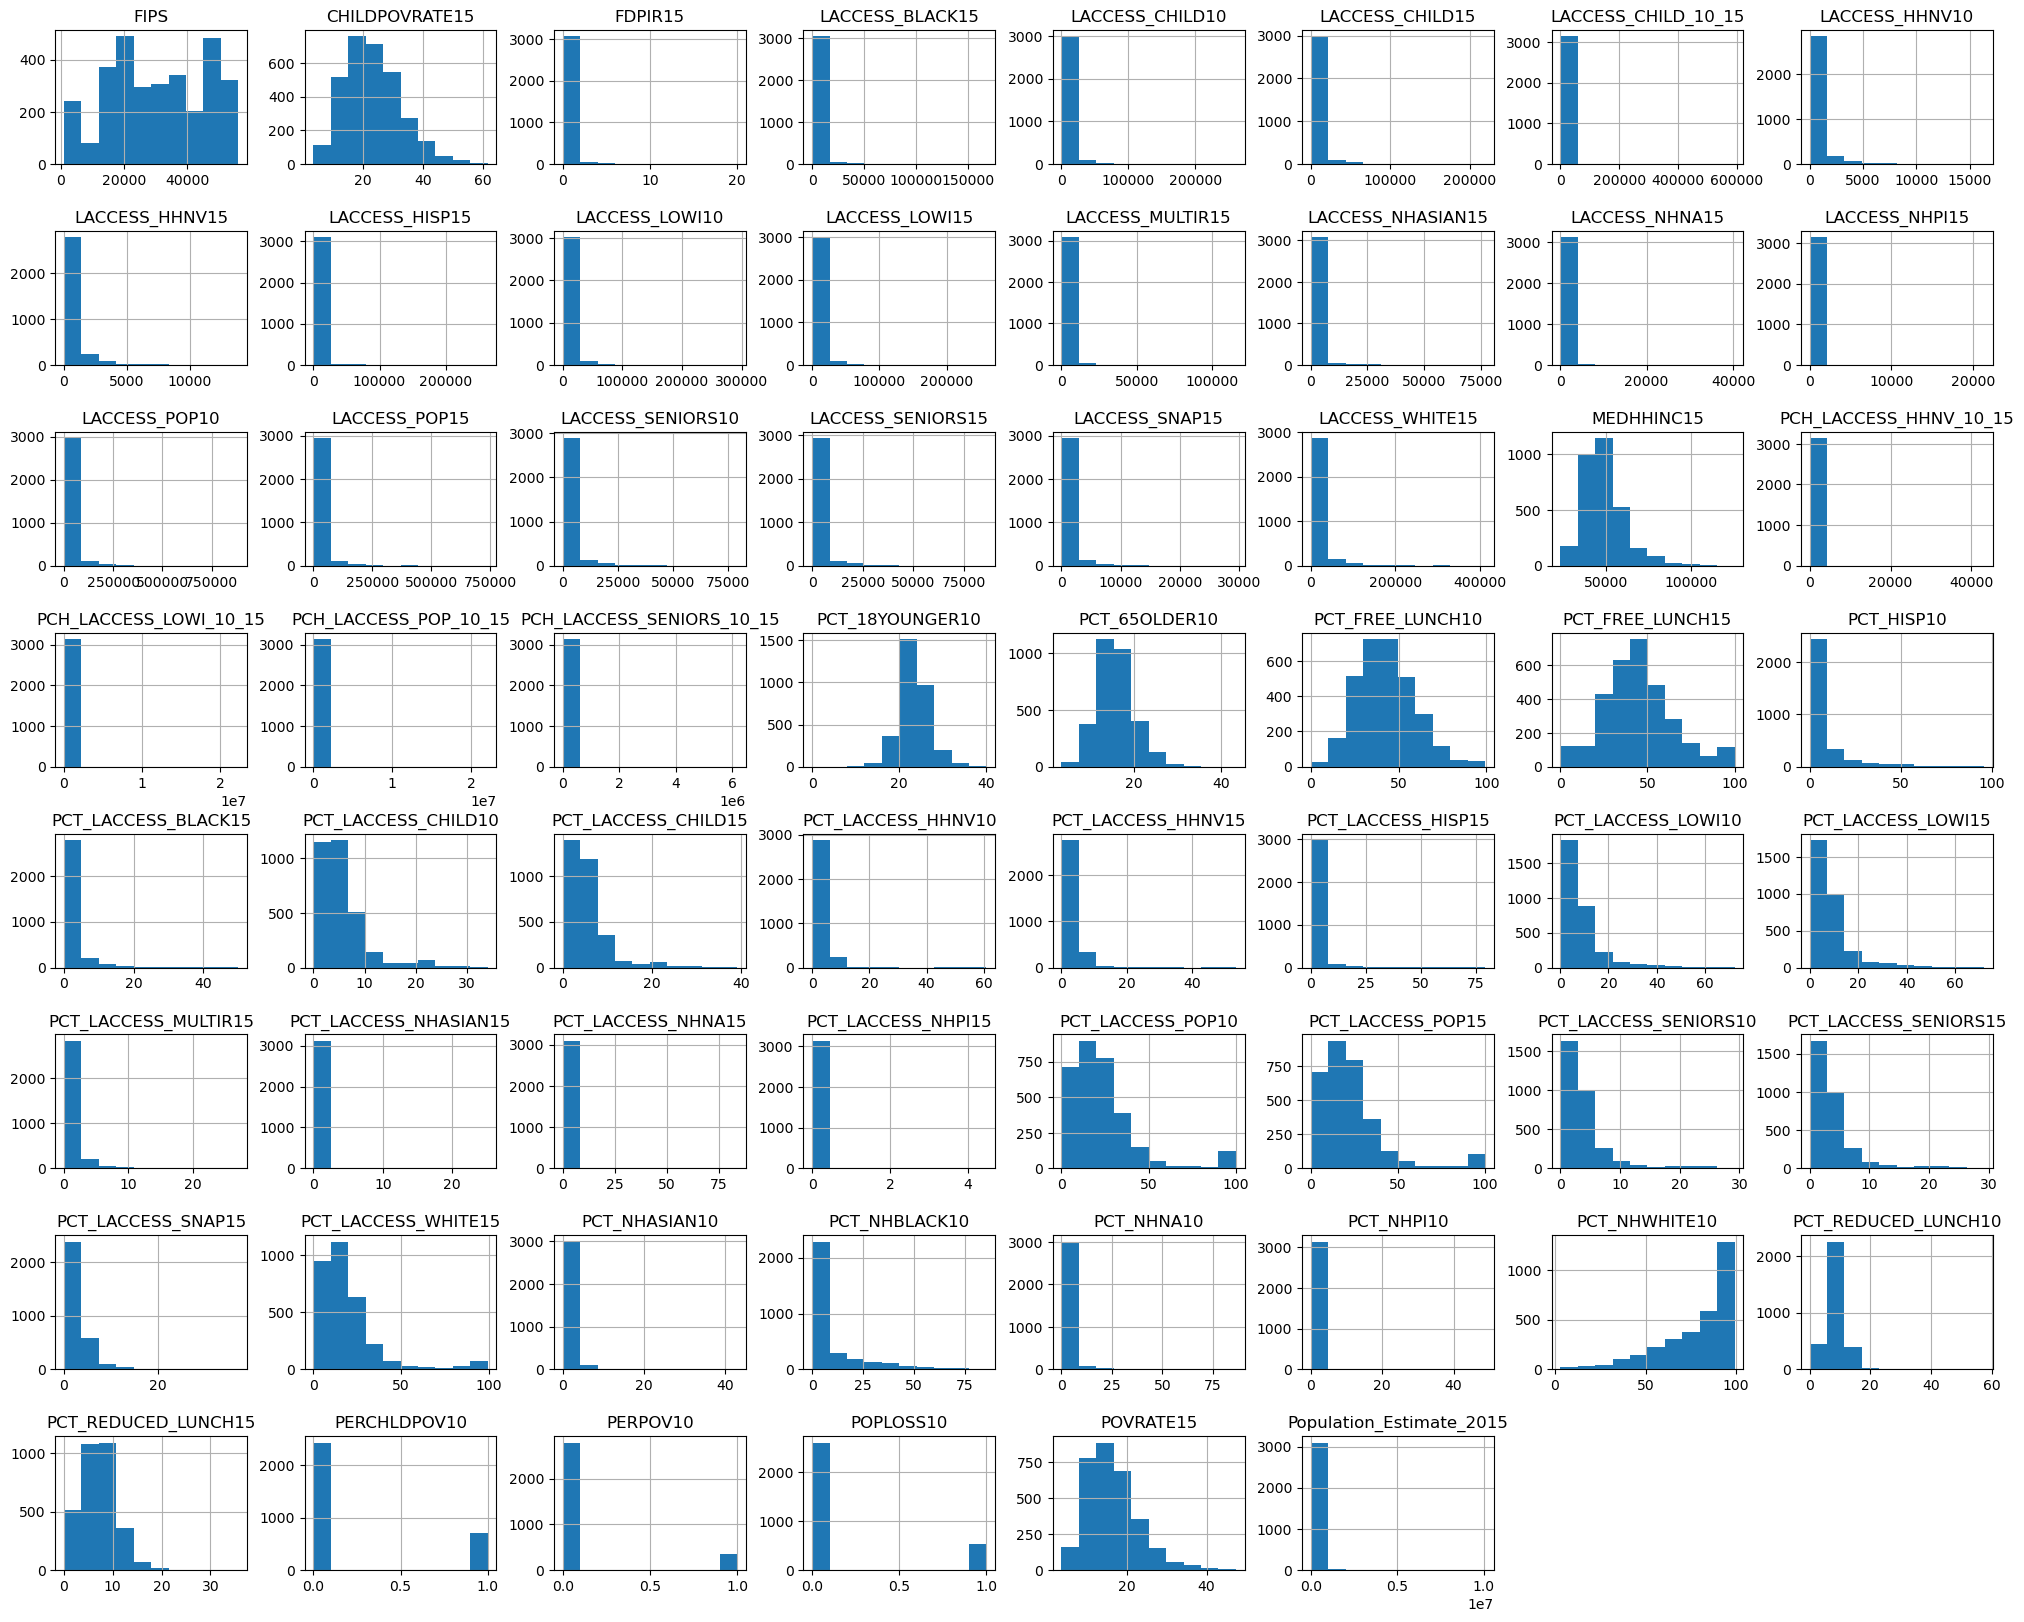

In [338]:
df_full.hist(figsize = (25,20))
plt.subplots_adjust(hspace=0.5);

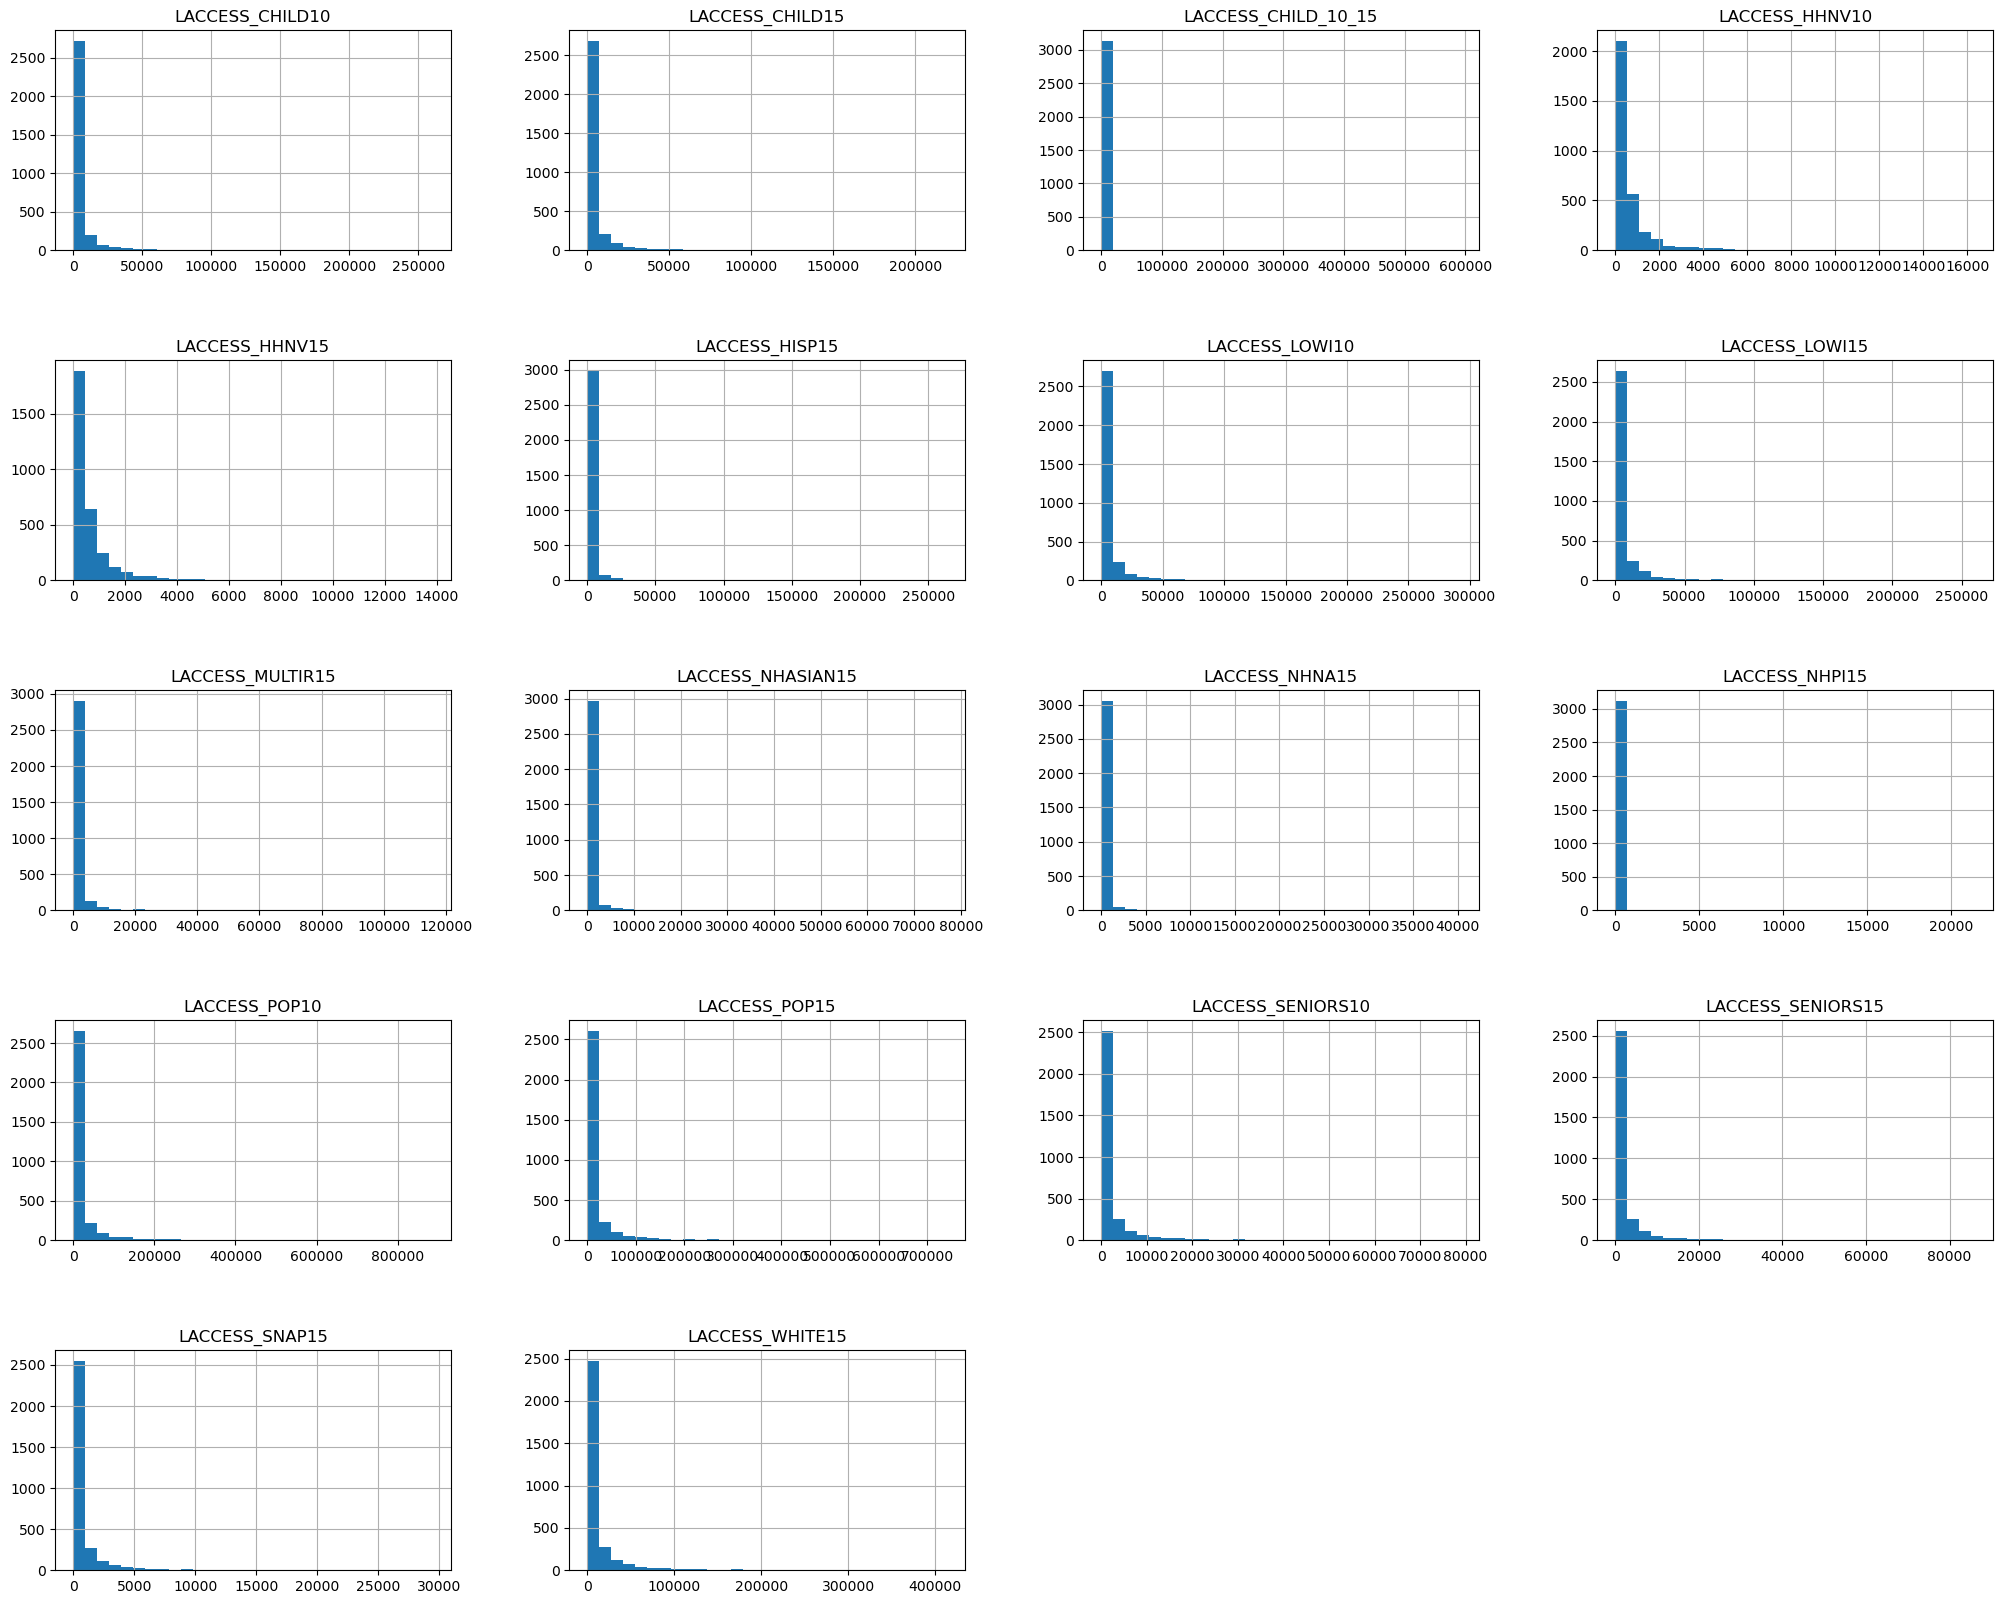

In [339]:
df_full.iloc[:,7:25].hist(figsize = (25,20),bins=30)
plt.subplots_adjust(hspace=0.5);

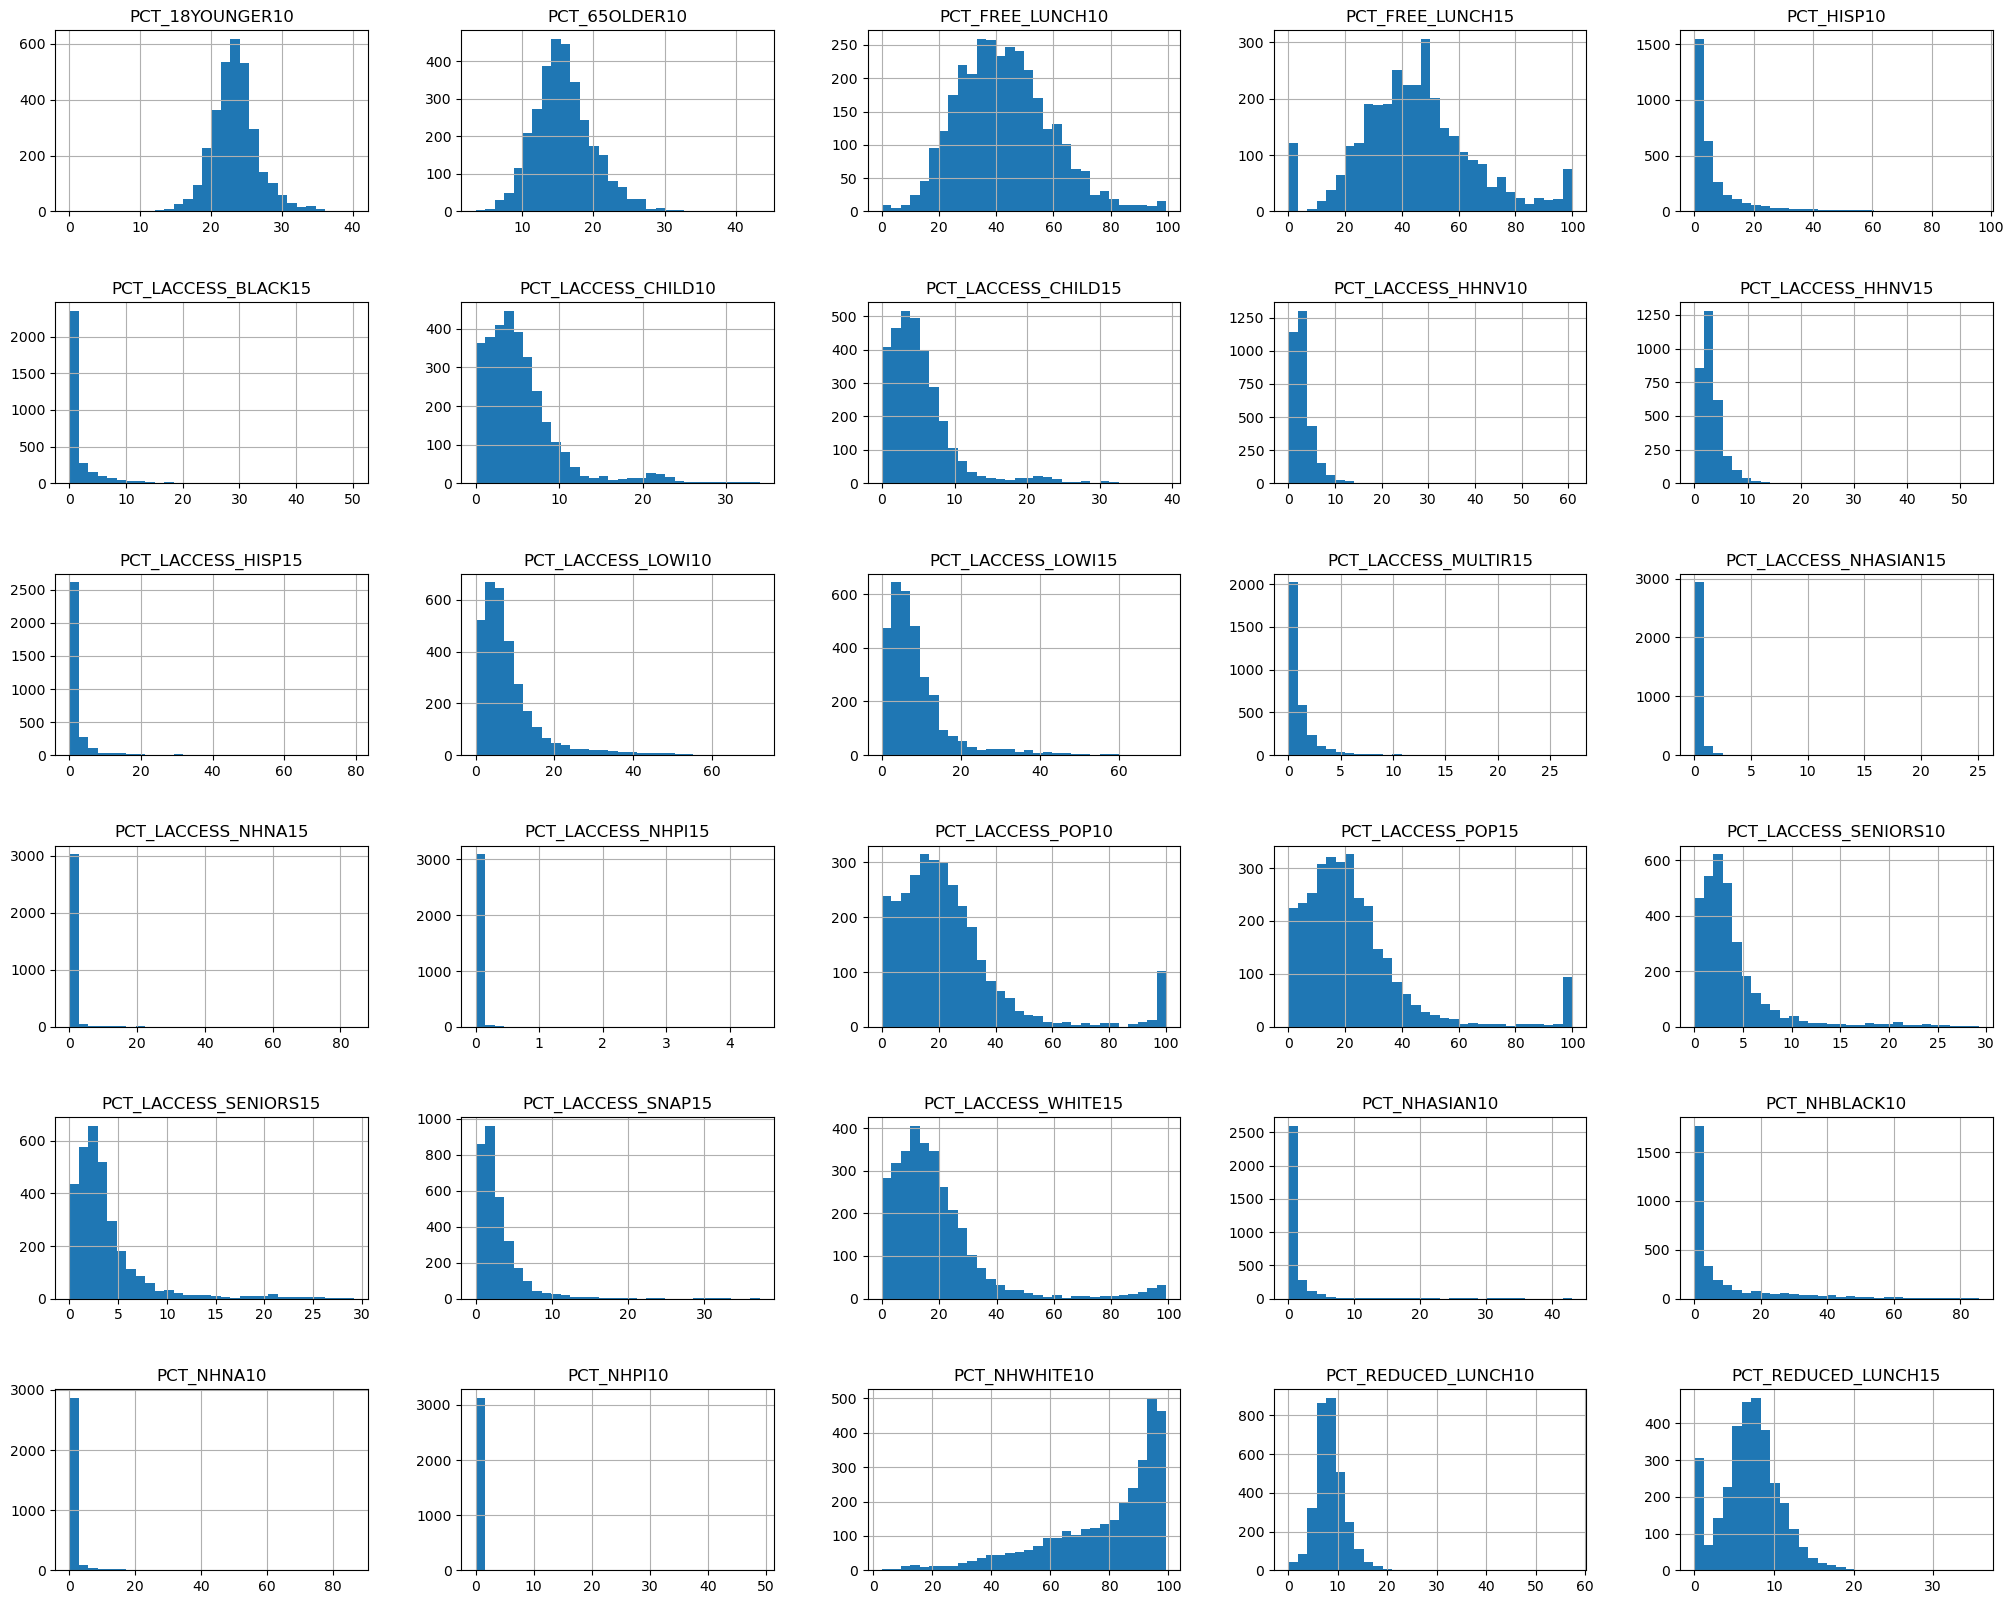

In [340]:
df_full.iloc[:,30:60].hist(figsize = (25,20),bins=30)
plt.subplots_adjust(hspace=0.5);

### Boxplots

Text(0.5, 1.0, 'Distribution of Seniors with Low Access')

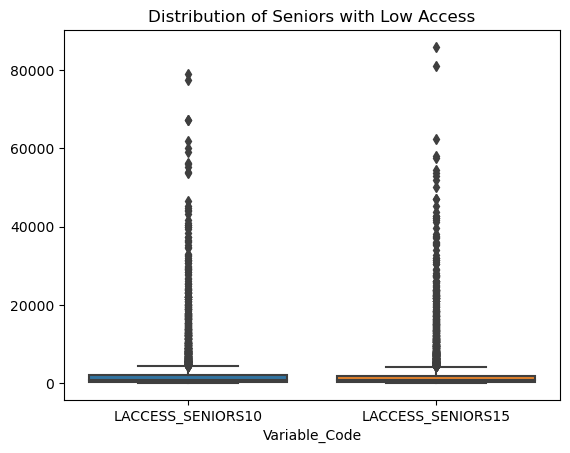

In [341]:
sns.boxplot(df_full[['LACCESS_SENIORS10', 'LACCESS_SENIORS15']])
plt.title("Distribution of Seniors with Low Access")

Text(0.5, 1.0, 'Distribution of American Indian and Alaska Native Population with Low Access')

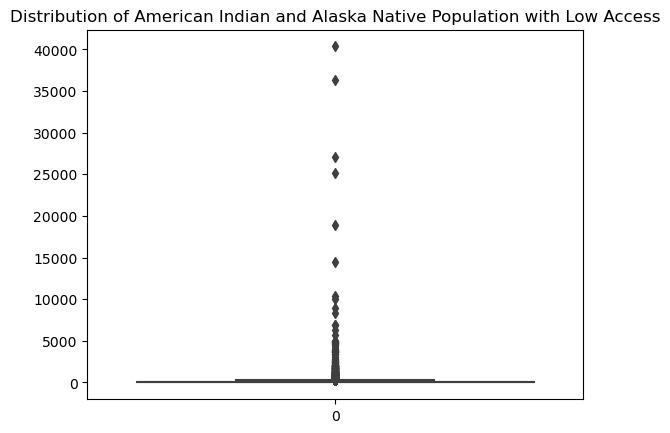

In [342]:
sns.boxplot(df_full['LACCESS_NHNA15'])
plt.title("Distribution of American Indian and Alaska Native Population with Low Access")

Text(0.5, 1.0, 'Distribution of Hawaiian or Pacific Islander Population with Low Access')

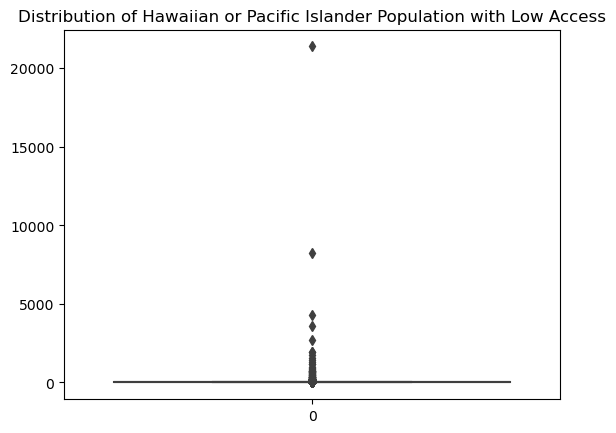

In [343]:
sns.boxplot(df_full['LACCESS_NHPI15'])
plt.title("Distribution of Hawaiian or Pacific Islander Population with Low Access")

Text(0.5, 1.0, 'Distribution of Asian Population with Low Access')

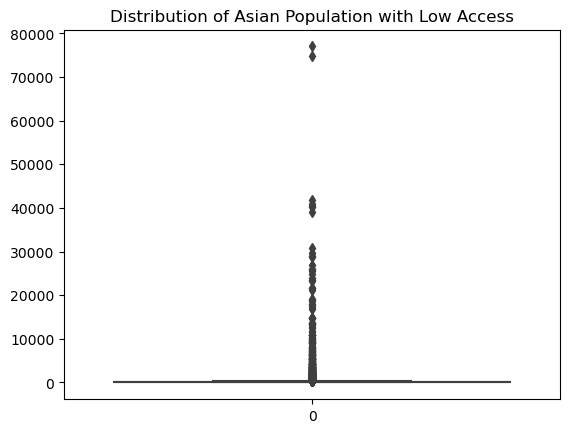

In [344]:
sns.boxplot(df_full['LACCESS_NHASIAN15'])
plt.title("Distribution of Asian Population with Low Access")

Text(0.5, 1.0, 'Distribution of Percent of Population with Low Access')

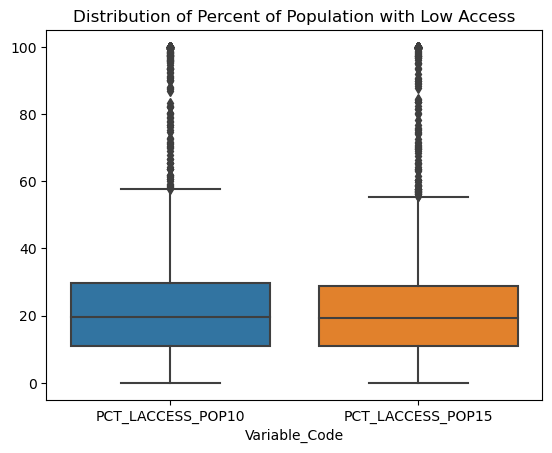

In [345]:
sns.boxplot(df_full[['PCT_LACCESS_POP10', 'PCT_LACCESS_POP15']])
plt.title("Distribution of Percent of Population with Low Access")

Text(0.5, 1.0, 'Distribution of Percent of Asian Population with Low Access')

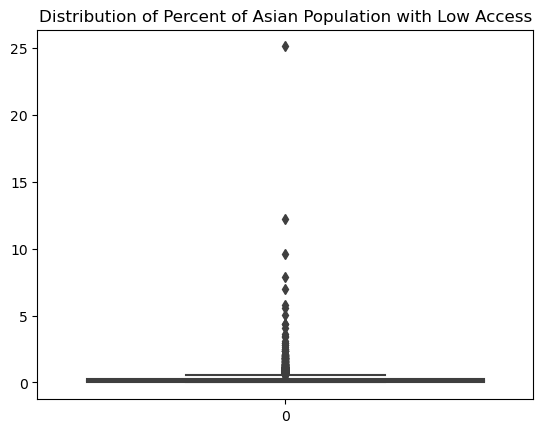

In [346]:
sns.boxplot(df_full['PCT_LACCESS_NHASIAN15'])
plt.title("Distribution of Percent of Asian Population with Low Access")

Text(0.5, 1.0, 'Distribution of Percent of Hawaiian and Pacific Islander Population with Low Access')

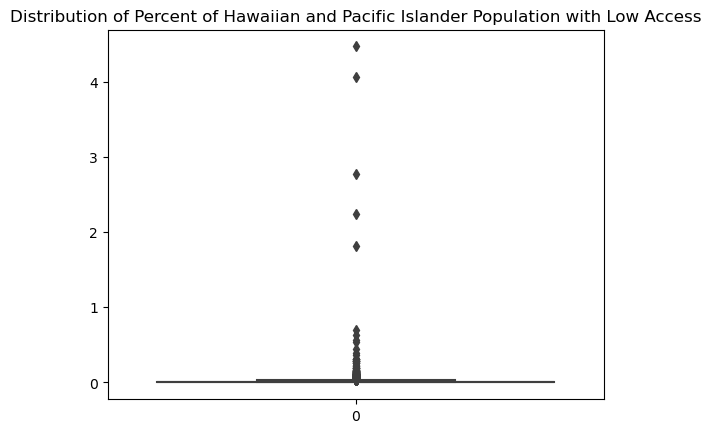

In [347]:
sns.boxplot(df_full['PCT_LACCESS_NHPI15'])
plt.title("Distribution of Percent of Hawaiian and Pacific Islander Population with Low Access")

Text(0.5, 1.0, 'Distribution of Percent of American Indian and Alaskan Population with Low Access')

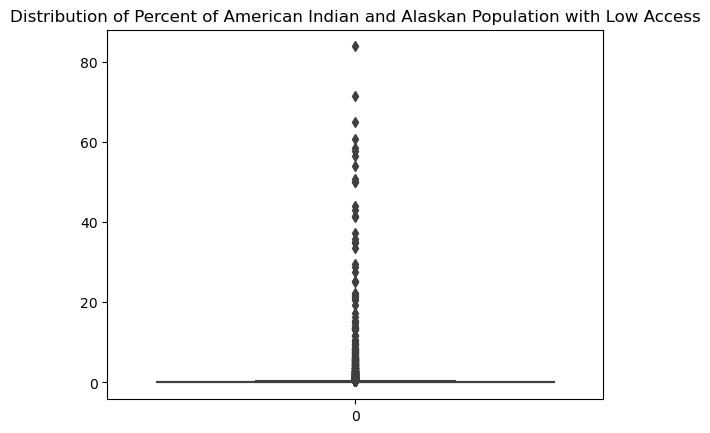

In [348]:
sns.boxplot(df_full['PCT_LACCESS_NHNA15'])
plt.title("Distribution of Percent of American Indian and Alaskan Population with Low Access")

<Axes: >

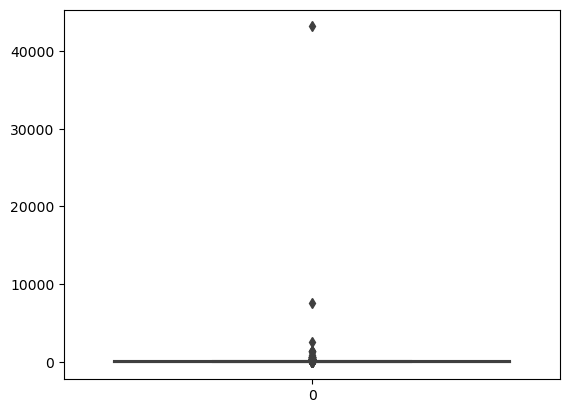

In [349]:
sns.boxplot(df_full['PCH_LACCESS_HHNV_10_15'])

<Axes: >

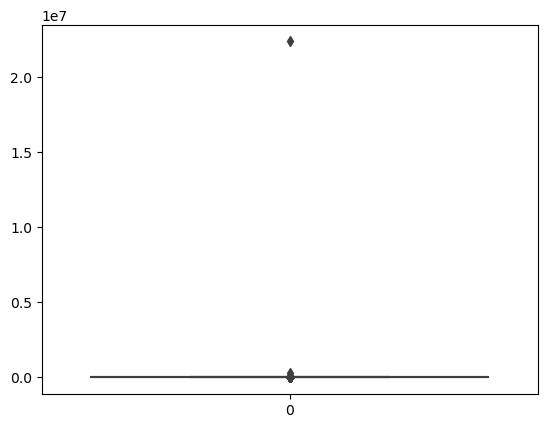

In [350]:
sns.boxplot(df_full['PCH_LACCESS_LOWI_10_15'])

<Axes: >

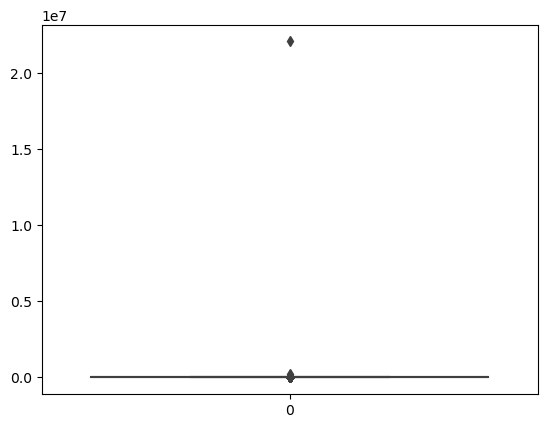

In [351]:
sns.boxplot(df_full['PCH_LACCESS_POP_10_15'])

<Axes: >

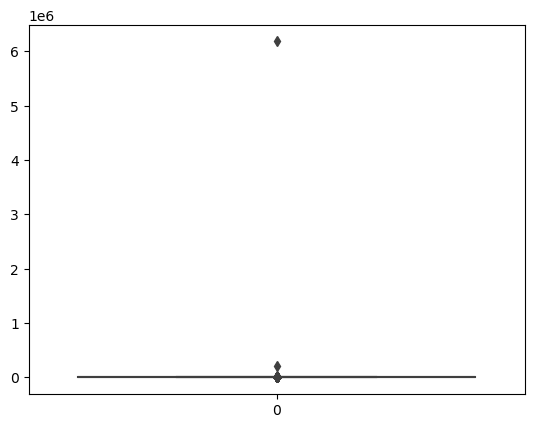

In [352]:
sns.boxplot(df_full['PCH_LACCESS_SENIORS_10_15'])

## Initial Exploratory Data Analysis

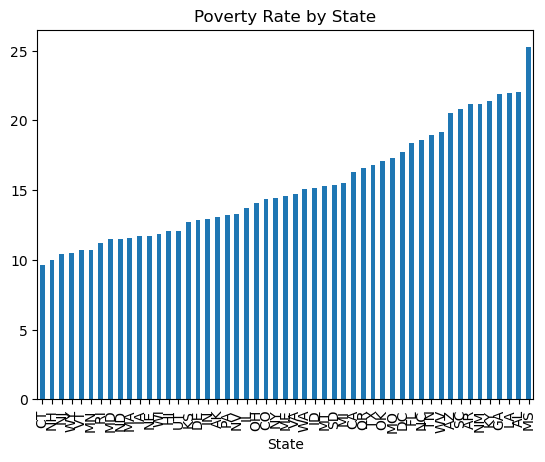

In [353]:
pov_by_state = df_full.groupby("State")["POVRATE15"].mean().sort_values(ascending=True)
pov_by_state.plot(kind="bar", title="Poverty Rate by State")
plt.show()

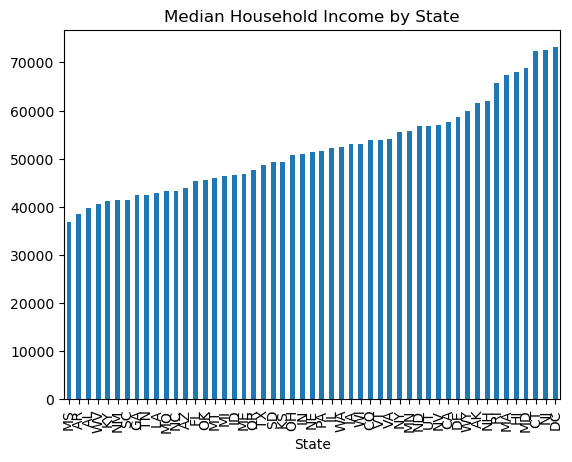

In [354]:
median_income = df_full.groupby("State")["MEDHHINC15"].mean().sort_values(ascending=True)
median_income.plot(kind="bar", title="Median Household Income by State")
plt.show()

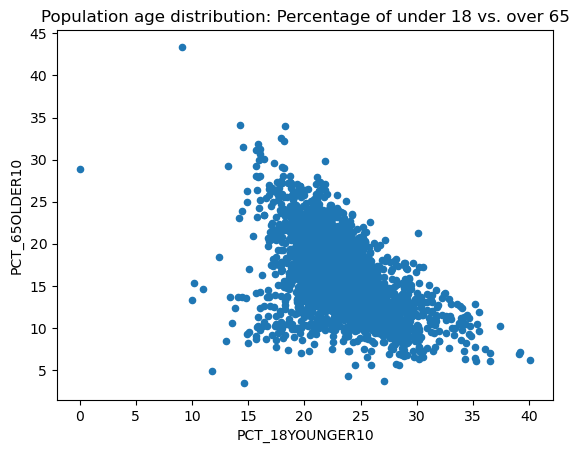

In [355]:
df_full.plot(x="PCT_18YOUNGER10", y="PCT_65OLDER10", kind="scatter")
plt.title("Population age distribution: Percentage of under 18 vs. over 65")
plt.show()

In [356]:
state_pov_means = df_full.groupby('State')[['CHILDPOVRATE15', 'POVRATE15']].mean()
state_pov_means.head()

Variable_Code,CHILDPOVRATE15,POVRATE15
State,,
AK,18.164286,13.085714
AL,31.628358,22.007463
AR,31.214667,21.162667
AZ,28.833333,20.520000
CA,22.246552,16.294828


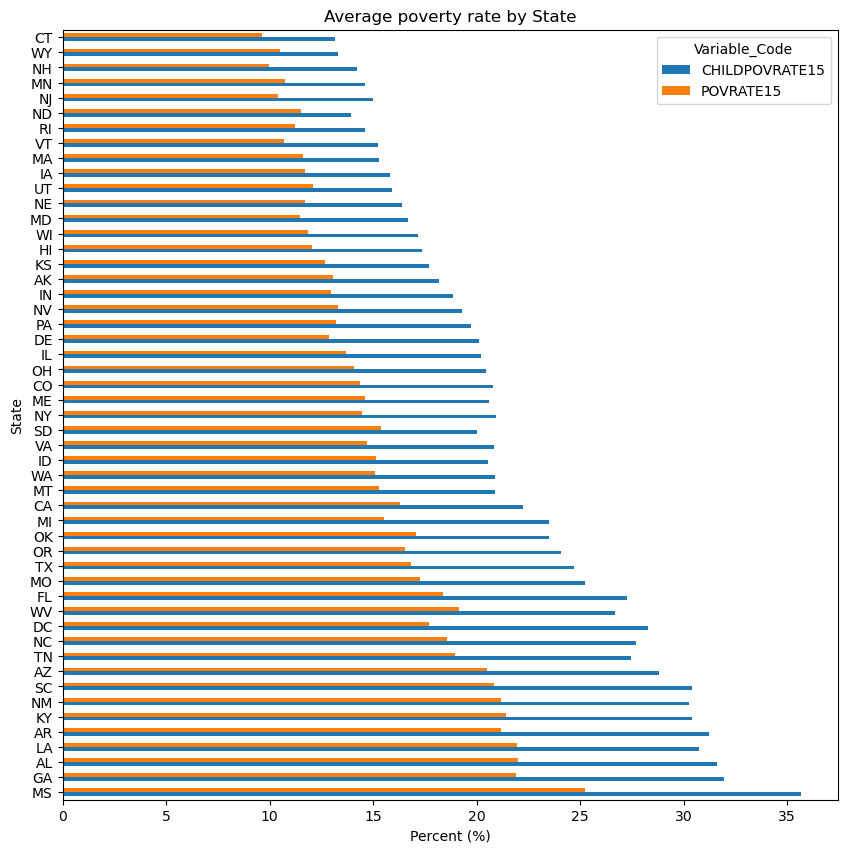

In [357]:
(state_pov_means.reindex(index=state_pov_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average poverty rate by State'))
plt.xlabel('Percent (%)');

In [358]:
race_means_15 = df_full.groupby('State')[['PCT_LACCESS_BLACK15', 'PCT_LACCESS_HHNV15','PCT_LACCESS_MULTIR15', 'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_WHITE15']].mean()
race_means_15.head()

Variable_Code,PCT_LACCESS_BLACK15,PCT_LACCESS_HHNV15,PCT_LACCESS_MULTIR15,PCT_LACCESS_NHASIAN15,PCT_LACCESS_WHITE15
State,,,,,
AK,0.517424,15.626172,3.977882,1.587912,21.657649
AL,6.129109,4.633911,0.441023,0.108511,9.409366
AR,4.690150,4.140053,0.852200,0.127928,16.786567
AZ,0.476624,3.732187,3.543934,0.301255,23.471028
CA,0.613848,1.544119,2.569602,0.838045,14.753103


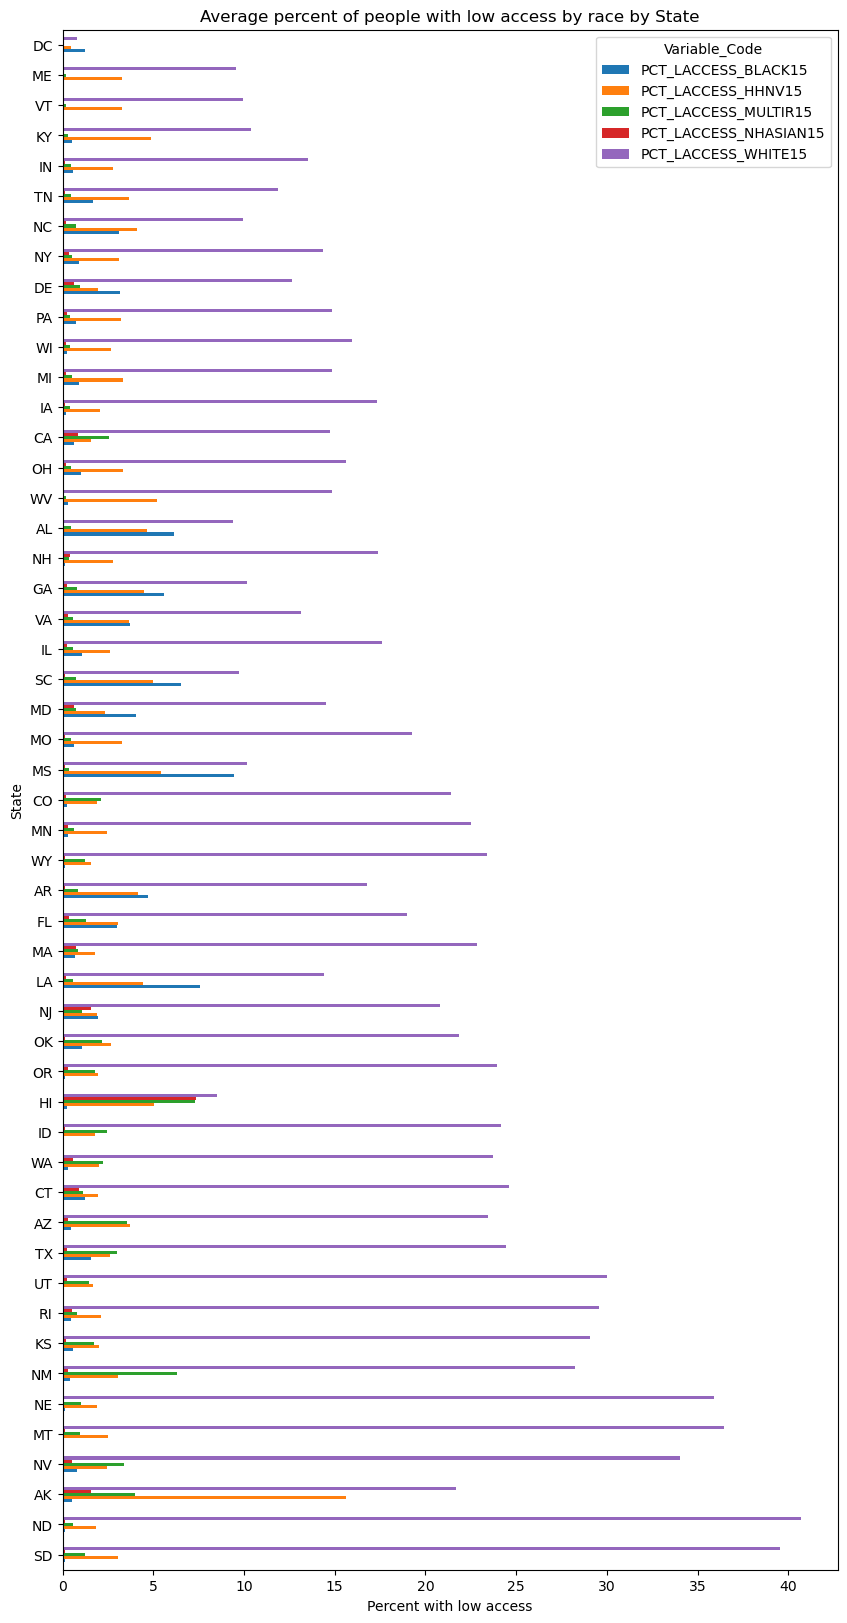

In [359]:
(race_means_15.reindex(index=race_means_15.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
plt.xlabel('Percent with low access');

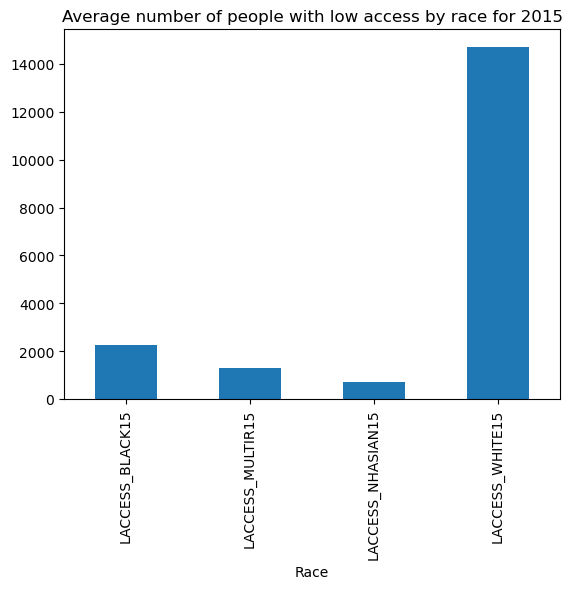

In [360]:
race_means = df_full[['LACCESS_BLACK15', 'LACCESS_MULTIR15', 'LACCESS_NHASIAN15', 'LACCESS_WHITE15']].mean()
race_means.plot(kind="bar", title="Average number of people with low access by race for 2015")
plt.xlabel('Race')
plt.show()

In [361]:
race_means_white = df_full.groupby('State')[['PCT_LACCESS_WHITE15', 'PCT_NHWHITE10']].mean()
race_means_white.head()

Variable_Code,PCT_LACCESS_WHITE15,PCT_NHWHITE10
State,,
AK,21.657649,52.334714
AL,9.409366,66.101869
AR,16.786567,76.993259
AZ,23.471028,52.825171
CA,14.753103,57.095504


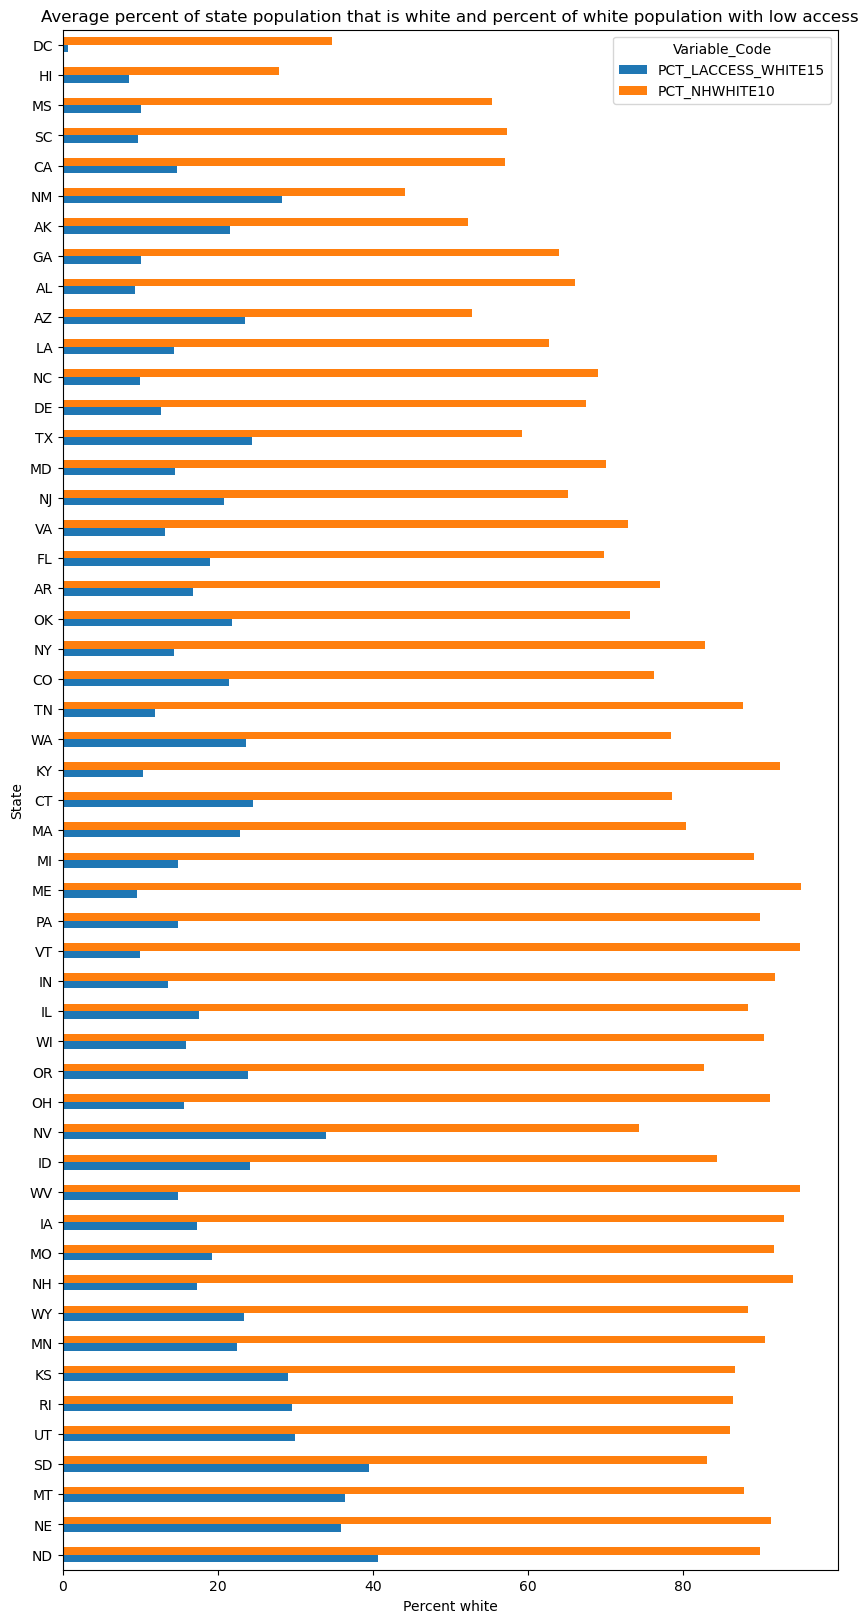

In [362]:
(race_means_white.reindex(index=race_means_white.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 20), title='Average percent of state population that is white and percent of white population with low access'))
plt.xlabel('Percent white');

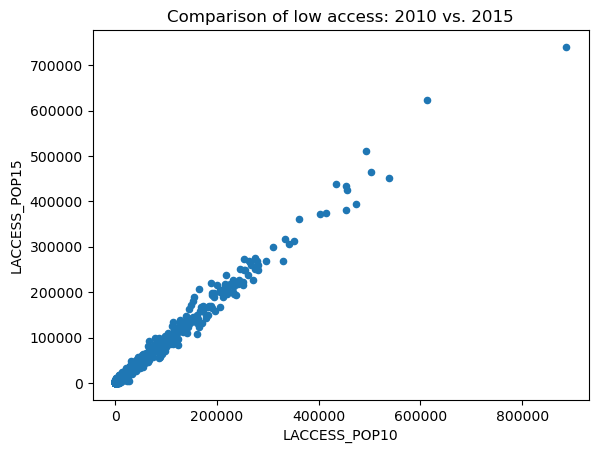

In [363]:
df_full.plot(x="LACCESS_POP10", y="LACCESS_POP15", kind="scatter")
plt.title("Comparison of low access: 2010 vs. 2015")
plt.show()

In [364]:
low_access_states = df_full.groupby('State')[['LACCESS_POP10', 'LACCESS_POP15', 'Population_Estimate_2015']].mean()
low_access_states.head()

Variable_Code,LACCESS_POP10,LACCESS_POP15,Population_Estimate_2015
State,,,
AK,7805.002146,7819.111122,26048.571429
AL,15304.357174,14371.804328,72435.223881
AR,8262.001127,7838.947589,39712.093333
AZ,81267.922268,83623.853433,455573.066667
CA,79221.516190,74540.508724,671605.896552


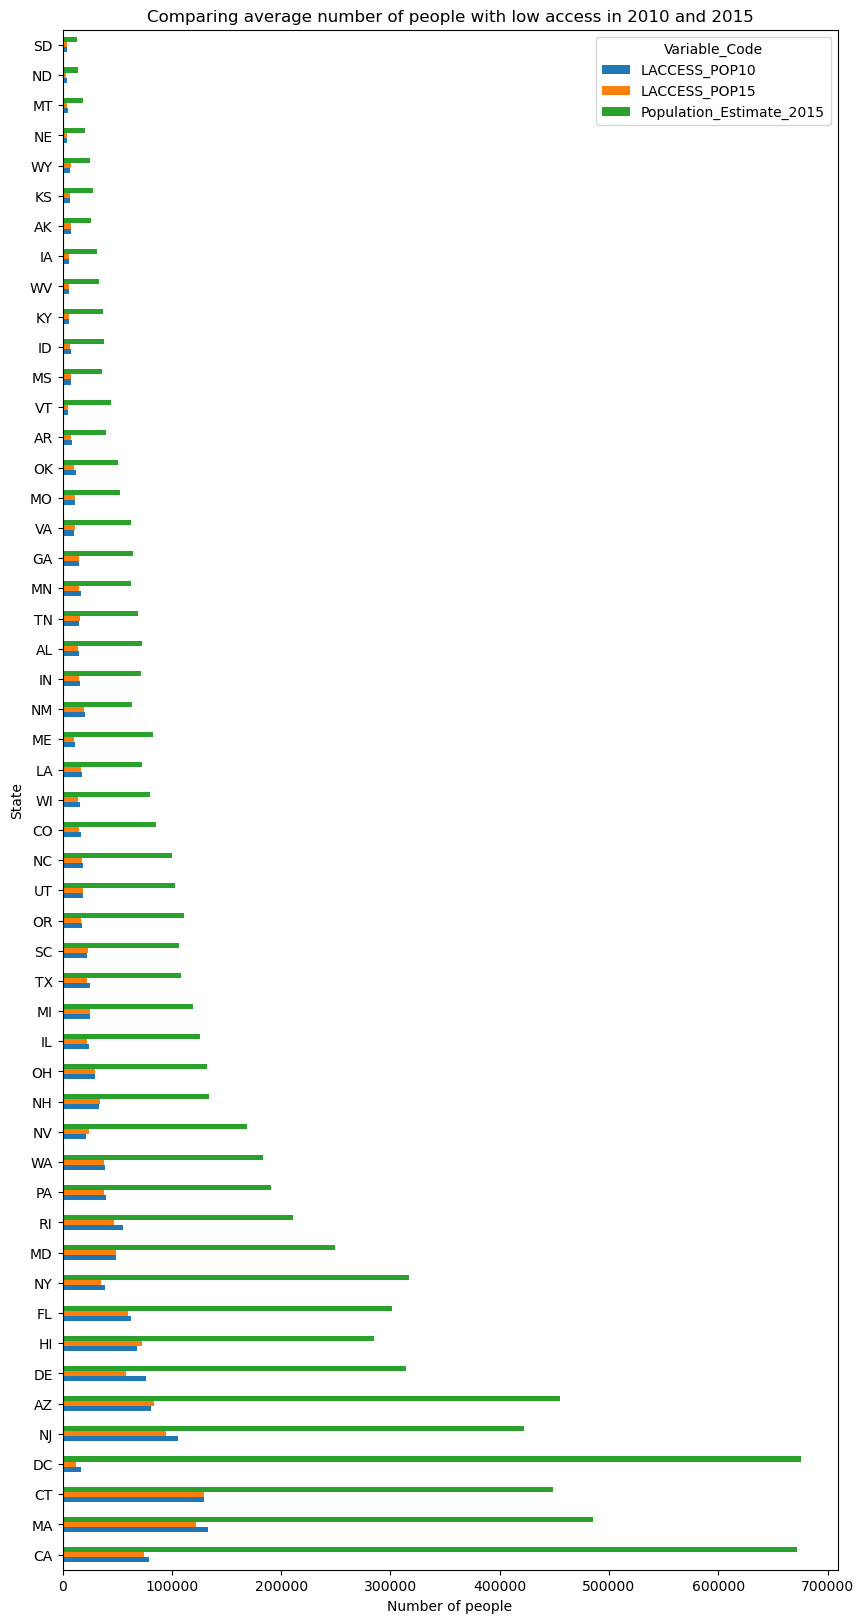

In [365]:
(low_access_states.reindex(index=low_access_states.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 20), title='Comparing average number of people with low access in 2010 and 2015'))
plt.xlabel('Number of people');

In [366]:
sd_lowaccess = df_full[df_full['State']=='SD'].groupby('County')[['LACCESS_POP10', 'LACCESS_POP15', 'Population_Estimate_2015']].mean()
sd_lowaccess.head()

Variable_Code,LACCESS_POP10,LACCESS_POP15,Population_Estimate_2015
County,,,
aurora,2706.276304,2016.246110,2740.0
beadle,3918.715208,3935.360546,18120.0
bennett,3319.803232,3319.803232,3401.0
bon homme,6208.518406,998.050309,6947.0
brookings,13054.722730,12665.293630,33796.0


In [367]:
#(sd_lowaccess.reindex(index=sd_lowaccess.mean(axis=1)
#    .sort_values(ascending=False)
#    .index)
#    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
#plt.xlabel('Percent with low access');

In [368]:
me_lowaccess = df_full[df_full['State']=='ME'].groupby('County')[['LACCESS_POP10', 'LACCESS_POP15', 'Population_Estimate_2015']].mean()
me_lowaccess.head()

Variable_Code,LACCESS_POP10,LACCESS_POP15,Population_Estimate_2015
County,,,
androscoggin,12164.627490,12978.324080,107155.0
aroostook,7550.539820,7943.720326,68855.0
cumberland,61015.113470,59726.428460,289544.0
franklin,468.117183,779.482896,30057.0
hancock,3364.161072,2217.662919,54245.0


In [369]:
#(me_lowaccess.reindex(index=me_lowaccess.mean(axis=1)
#    .sort_values(ascending=False)
#    .index)
#    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
#plt.xlabel('Percent with low access');

In [370]:
mo_lowaccess = df_full[df_full['State']=='MO'].groupby('County')[['LACCESS_POP10', 'LACCESS_POP15', 'Population_Estimate_2015']].mean()
mo_lowaccess.head()

Variable_Code,LACCESS_POP10,LACCESS_POP15,Population_Estimate_2015
County,,,
adair,4815.458663,4613.814880,25307.0
andrew,2733.463165,1830.110217,17318.0
atchison,297.728028,706.578852,5293.0
audrain,5191.444462,4094.809008,25937.0
barry,2786.654735,3960.032387,35310.0


In [371]:
#(mo_lowaccess.reindex(index=mo_lowaccess.mean(axis=1)
#    .sort_values(ascending=False)
#    .index)
#    .plot(kind='barh', figsize=(10, 20), title='Average percent of people with low access by race by State'))
#plt.xlabel('Percent with low access');